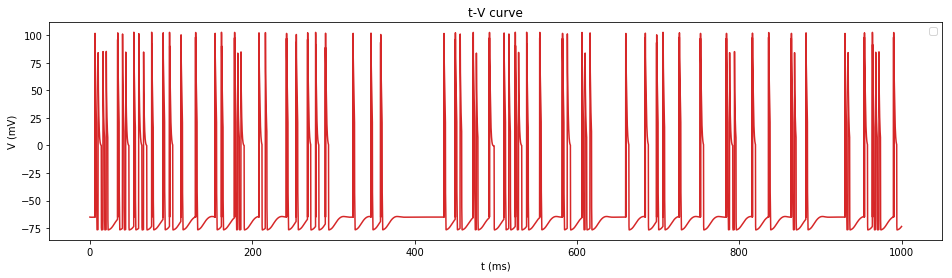

In [31]:
from brian2 import *
import numpy as np
import math
import random

start_scope()
El = -54.4*mV
ENa = 50*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

Cm=1*uF/cm**2
duration = 1000
dt =  2*ms 

t_start=0
t_end=duration
sigma = 0.03*amp/metre**2
dt_cur = 2
sigma = sigma/(np.sqrt(dt_cur))
mi=0
unit_time=ms

tmp_size = 1 + t_end  # +1 for t=0

tmp = np.zeros((tmp_size/dt_cur, 1))*amp/metre**2
size=10
x = np.linspace(-size, size, size/dt_cur)*amp/metre**2
normal = np.asarray((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2)))

normal = normal*amp/metre**2
for k in range(int(tmp_size/dt_cur)):
    tmp[k, 0] = random.choice(normal)

input_density = TimedArray(tmp, dt=dt)

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
dv/dt = (gl*(El-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-EK) + input_density(t,i))/Cm : volt

dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+40*mV) / (1-(exp((-v-40*mV) / (10*mV))))/ms : Hz
betam = 4 * exp((-v-(65*mV))/(18*mV))/ms : Hz
alphah = 0.07 * exp((-v-(65*mV))/(20*mV))/ms : Hz
betah = 1/(exp((-v-35*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (v+55*mV) / (1-(exp((-v-55*mV) / (10*mV))))/ms : Hz
betan = 0.125*exp((-v-(65*mV))/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = NeuronGroup(2, eqs,
                    threshold='v > 105*mV', reset = 'v=-65*mV',
                    method='euler', dt = 0.025*ms)

neuron.v = -65*mV
neuron.h = 0.6
neuron.m = 0.05
neuron.n = 0.32
neuron.gNa = gNa0
M = StateMonitor(neuron, variables=True, record=True)

run(duration*ms)

figure(figsize=(16, 4))
plot(M.t/ms, M.v[0]/mV,c='C3')
xlabel('t (ms)')
ylabel('V (mV)')
plt.legend(loc=1)
title('t-V curve')
    
show()



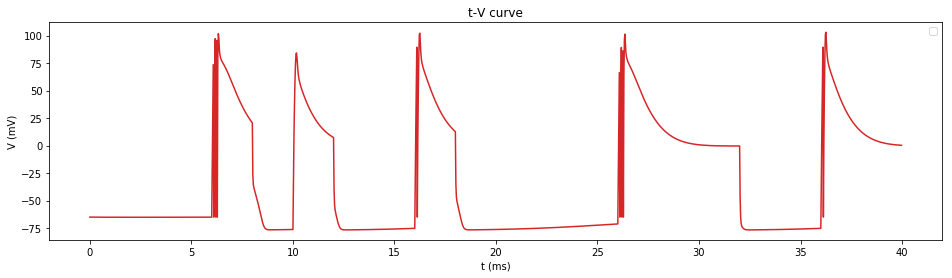

In [50]:
from brian2 import *
import numpy as np
import math
import random

El = -54.4*mV
ENa = 50*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

Cm=1*uF/cm**2
duration = 40
dt =  2*ms 

t_start=0
t_end=duration
sigma = 0.03*amp/metre**2
dt_cur = 2
sigma = sigma/(np.sqrt(dt_cur))
mi=0
unit_time=ms

tmp_size = 1 + t_end  # +1 for t=0

tmp = np.zeros((tmp_size/dt_cur, 1))*amp/metre**2
size=10
x = np.linspace(-size, size, size/dt_cur)*amp/metre**2
normal = np.asarray((1/np.sqrt(2*math.pi*sigma**2))*math.e**(-((x-mi)**2)/(2*sigma**2)))

normal = normal*amp/metre**2
for k in range(int(tmp_size/dt_cur)):
    tmp[k, 0] = random.choice(normal)

input_density = TimedArray(tmp, dt=dt)

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
dv/dt = (gl*(El-v) - gNa*(m*m*m)*h*(v-ENa) - gK*(n*n*n*n)*(v-EK) + input_density(t,i))/Cm : volt 

dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (v+40*mV) / (1-(exp((-v-40*mV) / (10*mV))))/ms : Hz
betam = 4 * exp((-v-(65*mV))/(18*mV))/ms : Hz
alphah = 0.07 * exp((-v-(65*mV))/(20*mV))/ms : Hz
betah = 1/(exp((-v-35*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (v+55*mV) / (1-(exp((-v-55*mV) / (10*mV))))/ms : Hz
betan = 0.125*exp((-v-(65*mV))/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = NeuronGroup(20, eqs,
                    threshold='v > 105*mV', reset = 'v=-65*mV',
                    method='euler', dt = 0.025*ms)

neuron.v = -65*mV
neuron.h = 0.6
neuron.m = 0.05
neuron.n = 0.32
neuron.gNa = gNa0
M = StateMonitor(neuron, variables=True, record=True)
spikes = SpikeMonitor(neuron, variables='v')

run(duration*ms)

figure(figsize=(16, 4))
plot(M.t/ms, M.v[0]/mV,c='C3')
xlabel('t (ms)')
ylabel('V (mV)')
plt.legend(loc=1)
title('t-V curve')

    
show()
